# 1. RNN을 이용하여 텍스트 생성하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [4]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [5]:
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [6]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [7]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [8]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [9]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [10]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [11]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [12]:
print(y) # 모든 샘플에 대한 레이블 출력

[ 3  1  4  5  1  7  1  9 10  1 11]


In [13]:
y = to_categorical(y, num_classes=vocab_size)

In [14]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN,Flatten

In [18]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 3s - 3s/step - accuracy: 0.0000e+00 - loss: 2.5048
Epoch 2/200
1/1 - 0s - 34ms/step - accuracy: 0.0909 - loss: 2.4898
Epoch 3/200
1/1 - 0s - 62ms/step - accuracy: 0.0909 - loss: 2.4750
Epoch 4/200
1/1 - 0s - 36ms/step - accuracy: 0.2727 - loss: 2.4603
Epoch 5/200
1/1 - 0s - 32ms/step - accuracy: 0.2727 - loss: 2.4456
Epoch 6/200
1/1 - 0s - 32ms/step - accuracy: 0.3636 - loss: 2.4308
Epoch 7/200
1/1 - 0s - 58ms/step - accuracy: 0.3636 - loss: 2.4156
Epoch 8/200
1/1 - 0s - 34ms/step - accuracy: 0.3636 - loss: 2.4000
Epoch 9/200
1/1 - 0s - 57ms/step - accuracy: 0.3636 - loss: 2.3839
Epoch 10/200
1/1 - 0s - 32ms/step - accuracy: 0.3636 - loss: 2.3670
Epoch 11/200
1/1 - 0s - 58ms/step - accuracy: 0.3636 - loss: 2.3494
Epoch 12/200
1/1 - 0s - 33ms/step - accuracy: 0.3636 - loss: 2.3308
Epoch 13/200
1/1 - 0s - 32ms/step - accuracy: 0.3636 - loss: 2.3113
Epoch 14/200
1/1 - 0s - 58ms/step - accuracy: 0.3636 - loss: 2.2908
Epoch 15/200
1/1 - 0s - 32ms/step - accuracy: 0.3636 - 

In [19]:
import matplotlib.pyplot as plt

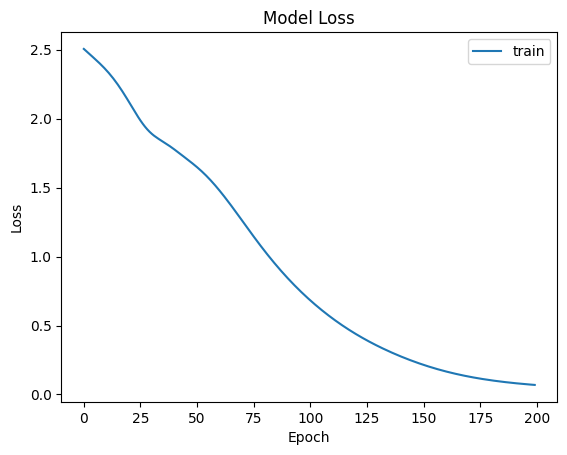

In [21]:
# 훈련 손실 그래프
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train'], loc='upper right')
plt.show()

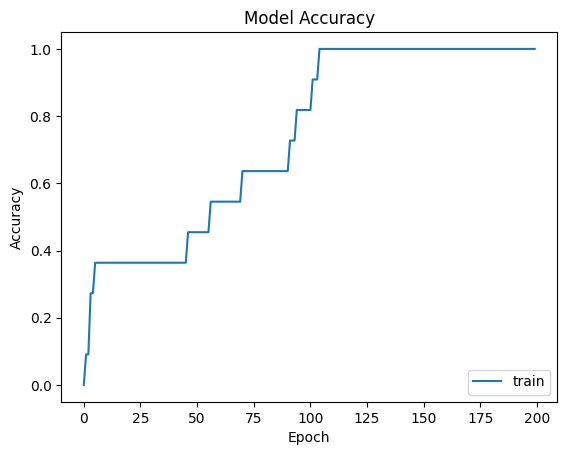

In [22]:
# 훈련 정확도 그래프
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='lower right')
plt.show()

In [27]:
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)
        for word, index in tokenizer.word_index.items():
            if index == result:
                break
        current_word = current_word + ' '  + word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [24]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [25]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [26]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다
